In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.ticker import ScalarFormatter

In [122]:
r_square = {'서울특별시' : 605, '경기도' : 10171, '경상북도': 19030, '대구광역시': 885, '충청북도':7433, '대전광역시':540, '강원특별자치도':16875}

In [123]:
facDF = pd.DataFrame(pd.read_csv('./data/인구.박물관.미술관.csv'))
facDF['count'] = facDF['count'].str.replace(',', '')
facDF['population'] = facDF['population'].str.replace(',', '')

In [124]:
# facDF['count'].str.replace(',','')
facDF['population'] = facDF['population'].astype(int)
facDF['count'] = facDF['count'].astype(int)
facDF.dtypes

region          object
year             int64
count            int32
population       int32
get_culture    float64
museum           int64
museum_pub       int64
museum_pri       int64
museum_col       int64
gallery          int64
gallery_pub      int64
gallery_pri      int64
gallery_col      int64
dtype: object

In [125]:
def per_km2(nameDF, name, r_square=r_square):
    nameDF = pd.DataFrame()
    nameDF = facDF.loc[(facDF['region']==name) & (facDF['years']>=2010), :]
    
    nameDF.insert(5,'mu/km^2',(nameDF['museum']/r_square[name]).round(3))
    nameDF.insert(6,'mu/10k',0.0)
    nameDF.insert(11,'ga/km^2',(nameDF['gallery']/r_square[name]).round(3))
    nameDF.insert(12,'ga/10k',0.0)
    nameDF = nameDF.reset_index(drop=True)
    # print(range(len(nameDF)))
    
    for i in range(len(nameDF)):
        nameDF.loc[i,'mu/10k'] = ((nameDF.loc[i, 'museum'] / nameDF[i,'population']).values[0]*10**4).round(3)
        nameDF.loc[i,'ga/10k'] =((nameDF.loc[i, 'gallery'] / nameDF[i,'population']).values[0]*10**4).round(3)
        # print(popDF.loc[(popDF['region']==name) & (popDF['years']==nameDF.loc[i,'years']), 'total'].values[0])
    
    return nameDF
    

In [126]:
def ppc_ratio_m(df):
    m_ratioDF = df.loc[:, ['region',  'years']]
    m_ratioDF.loc[:,'m_pub'] = (df.loc[:,'museum_pub'] / df.loc[:,'museum']).round(2)
    m_ratioDF.loc[:,'m_pri'] = (df.loc[:,'museum_pri'] / df.loc[:,'museum']).round(2)
    m_ratioDF.loc[:,'m_col'] = (df.loc[:,'museum_col'] / df.loc[:,'museum']).round(2)
    return m_ratioDF
    # return df['m_pub'] / df['museum']

def ppc_ratio_g(df):
    g_ratioDF = df.loc[:, ['region',  'years']]
    g_ratioDF.loc[:,'g_pub'] = (df.loc[:,'gallery_pu'] / df.loc[:,'gallery']).round(2)
    g_ratioDF.loc[:,'g_pri'] = (df.loc[:,'gallery_pr'] / df.loc[:,'gallery']).round(2)
    g_ratioDF.loc[:,'g_col'] = (df.loc[:,'gallery_col'] / df.loc[:,'gallery']).round(2)
    return g_ratioDF
    

In [127]:
facDF.head()

,region,year,count,population,get_culture,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pub,gallery_pri,gallery_col
0,계,2015,2519,51529338,0.48885,809,371,336,102,202,51,140,11
1,서울,2015,342,10022181,0.34124,122,26,67,29,38,4,30,4
2,부산,2015,79,3513777,0.22483,16,6,4,6,5,1,4,0
3,대구,2015,66,2487829,0.26529,13,6,4,3,4,2,2,0
4,인천,2015,88,2925815,0.30077,25,14,11,1,6,2,3,1


In [128]:
years = facDF['year'].unique().tolist()

In [129]:
facDF.loc[facDF['region']=='계',:]

,region,year,count,population,get_culture,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pub,gallery_pri,gallery_col
0,계,2015,2519,51529338,0.48885,809,371,336,102,202,51,140,11
18,계,2016,2595,51696216,0.50197,826,379,351,96,219,55,150,14
36,계,2017,2657,51778544,0.51315,853,388,361,104,229,57,157,15
54,계,2018,2749,51826059,0.53043,873,398,371,104,251,68,168,15
72,계,2019,2825,51849861,0.54484,881,416,363,102,258,72,172,14
90,계,2020,3017,51829023,0.58211,897,430,362,105,267,73,179,15
108,계,2021,3087,51638809,0.59781,900,437,358,105,271,77,179,15
126,계,2022,3145,51439038,0.61140,909,439,364,106,285,80,190,15
144,계,2023,3248,51325329,0.63283,913,443,365,105,286,80,192,14
162,계,2024,3294,51217221,0.64314,916,447,364,105,288,80,194,14


In [130]:
facDF.loc[facDF['year']==2024,:]

,region,year,count,population,get_culture,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pub,gallery_pri,gallery_col
162,계,2024,3294,51217221,0.64314,916,447,364,105,288,80,194,14
163,서울,2024,469,9331828,0.50258,135,40,67,28,44,5,36,3
164,부산,2024,144,3266598,0.44083,32,19,13,0,10,2,9,2
165,대구,2024,102,2363629,0.43154,19,8,9,2,4,0,4,0
166,인천,2024,108,3021010,0.35750,14,7,6,1,6,1,4,1
167,광주,2024,83,1408422,0.58931,9,3,4,2,5,1,3,1
168,대전,2024,62,1439157,0.43081,15,4,7,4,7,4,2,1
169,울산,2024,50,1098049,0.45535,10,1,9,0,9,1,1,0
170,세종,2024,26,390685,0.66550,6,3,3,0,3,0,0,0
171,경기,2024,622,13694685,0.45419,129,57,60,12,59,15,41,3


In [131]:
sudoDF = pd.DataFrame()
for i in years:
    sudoDF[i] = (facDF.loc[(((facDF['region']=='서울') | (facDF['region']=='인천') | (facDF['region']=='경기')) & (facDF['year']==i)), :].sum())
sudoDF = sudoDF.T
sudoDF = sudoDF.drop(columns='region')
sudoDF['year'] = sudoDF.index
sudoDF = sudoDF.reset_index(drop=True)
sudoDF.head()

,year,count,population,get_culture,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pub,gallery_pri,gallery_col
0,2015,911,25470602,1.02612,290,100,150,41,75,16,64,8
1,2016,929,25590465,1.0206,283,96,151,36,92,16,67,9
2,2017,970,25679863,1.10431,287,137,153,42,97,16,70,11
3,2018,1013,25797418,1.13932,283,142,103,38,100,17,72,11
4,2019,1040,25925799,1.16741,279,97,142,40,102,19,74,9


In [132]:
bsudoDF = pd.DataFrame()
for i in years:
    bsudoDF[i] = (facDF.loc[((~((facDF['region']=='서울') | (facDF['region']=='인천') | (facDF['region']=='경기')| (facDF['region']=='계')))
                             & (facDF['year']==i)), :].sum())
bsudoDF = bsudoDF.T
bsudoDF = bsudoDF.drop(columns='region')
bsudoDF['year'] = bsudoDF.index
bsudoDF = bsudoDF.reset_index(drop=True)
bsudoDF.head(10)

,year,count,population,get_culture,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pub,gallery_pri,gallery_col
0,2015,1608,26058736,9.819,519,268,193,58,117,42,78,2
1,2016,1650,26105751,9.9728,538,308,172,62,113,40,78,1
2,2017,1696,26098681,10.11967,567,322,189,53,118,41,80,1
3,2018,1736,26028641,10.30387,578,331,205,56,142,54,86,7
4,2019,1785,25924062,10.72088,588,343,200,52,162,54,96,7
5,2020,1925,25790716,11.52998,607,326,223,58,157,53,96,5
6,2021,1969,25615526,11.74794,596,335,226,58,160,56,83,4
7,2022,1993,25453920,11.85422,620,332,233,54,139,45,86,5
8,2023,2115,25311064,12.64317,600,328,229,43,138,45,86,4
9,2024,2066,25169698,12.37366,617,329,241,47,137,44,89,6


In [133]:
sudoDF['museum']/sudoDF['population']

0    0.000011
1    0.000011
2    0.000011
3    0.000011
4    0.000011
5    0.000011
6    0.000011
7    0.000011
8    0.000011
9    0.000011
dtype: object

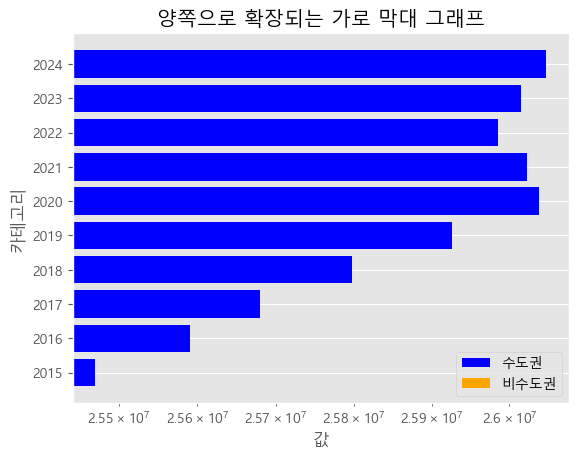

In [134]:
def jar_graph(categories, positive_values, negative_values):
    # 데이터 준비
    categories =categories
    positive_values = positive_values
    negative_values = -negative_values

    # 그래프 그리기
    plt.barh(categories, positive_values, color='blue', label="수도권")
    plt.barh(categories, negative_values, color='orange', label="비수도권")

    # 그래프 설정
    plt.axvline(0, color='black', linewidth=1)  # 가운데 기준선

# jar_graph(sudoDF['year'],sudoDF['museum']/sudoDF['population'],bsudoDF['museum']/bsudoDF['population'] )    
jar_graph(sudoDF['year'],sudoDF['population'],bsudoDF['population'] )    
plt.xlabel("값")
plt.ylabel("카테고리")
plt.xscale('log')
plt.xticks()
plt.yticks(sudoDF['year'])
plt.title("양쪽으로 확장되는 가로 막대 그래프")
plt.legend()

plt.show()


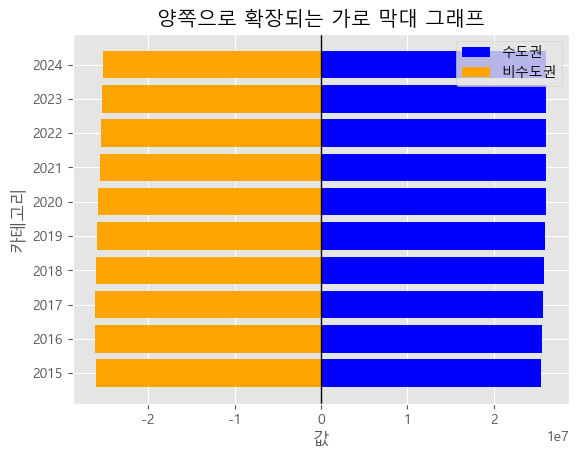

In [135]:
import matplotlib.pyplot as plt

def jar_graph(categories, positive_values, negative_values):
    # 데이터 준비
    positive_values = positive_values
    negative_values = negative_values  # 비수도권 값은 그대로 두고 음수로 설정하지 않음

    # 그래프 그리기
    plt.barh(categories, positive_values, color='blue', label="수도권")
    plt.barh(categories, -negative_values, color='orange', label="비수도권")  # 음수로 그리기

    # 그래프 설정
    plt.axvline(0, color='black', linewidth=1)  # 가운데 기준선

# 예시 데이터로 jar_graph 호출
jar_graph(sudoDF['year'], sudoDF['population'], bsudoDF['population'])  

# 그래프의 축 레이블과 제목 설정
plt.xlabel("값")
plt.ylabel("카테고리")
# plt.xscale('log')  # x축을 로그 스케일로 설정 (필요하면 제거)
# plt.xticks()  # x축 눈금 설정
plt.yticks(sudoDF['year'])  # y축에 년도 설정
plt.title("양쪽으로 확장되는 가로 막대 그래프")  # 제목 설정
plt.legend()  # 범례 설정

# 그래프 출력
plt.show()


In [141]:

def survey(results, category_names,cmap='summer'):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps[cmap](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.8,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax



In [205]:
sudoDF.loc[sudoDF['year']==i]

,year,count,population,get_culture,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pub,gallery_pri,gallery_col
9,2024,1199,26047523,1.31427,278,104,133,41,109,21,81,7


In [210]:
def make_ppc(dict, df, type):
    for i in df['year']:
        middle = df.loc[df['year']==i]
        dict[i]=[middle[type+'_pub'].values, middle[type+'_pri'].values, middle[type+'_col'].values]
        
    return dict
    

In [211]:
results= {}
results = make_ppc(results,sudoDF,'museum')

TypeError: only length-1 arrays can be converted to Python scalars

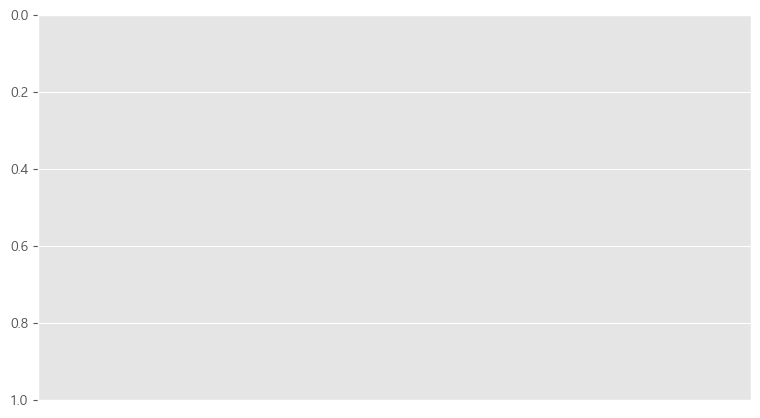

In [212]:
category_names = ['국공립                                                               ', '사립                                                          ',
 ' 대학                       ']
# results = {
#     '수도권': 
#     '비수도권': list(map(lambda x: x*100, seoDF_r.iloc[11,2:].to_list())),

# }
survey(results, category_names)
plt.show()